In [6]:
from algorithm import *

### Question 1

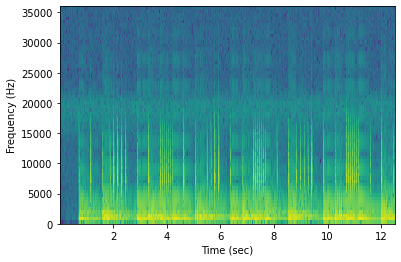

In [9]:
if __name__ == '__main__':

    encoder = Encoding()
    fs, s = read('./samples/Late truth - Audio Hertz.wav')
    encoder.process(fs, s[:900000])
    encoder.display_spectrogram(display_anchors=False)

In [22]:
f, t, Sxx = encoder.spectro

Sxx = Sxx.flatten()

Sxx.sort()
total_energy = float(sum(Sxx))
energy, i = 0., 1
while energy/total_energy < 0.9:
    energy += float(Sxx[-i])
    i += 1
print(f"Il faut {i} coefficients, sur {np.size(Sxx)} soit {100*(i/np.size(Sxx))}%.")


Il faut 9162 coefficients, sur 609310 soit 1.5036680835699396%.


On observe que l'énergie n'est pas répartie de façon uniforme, mais qu'elle est concentrée dans les basses fréqences (je n'arrive pas à afficher colorbar). Par ailleurs, il ne faut en réalité même pas 2% des coefficients pour avoir 90% de l'énergie du signal.

### Question 2

c:\Users\profi\Documents\Mines1A\TDS\TDS\algorithm.py:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, Sxx, norm = colors.LogNorm())


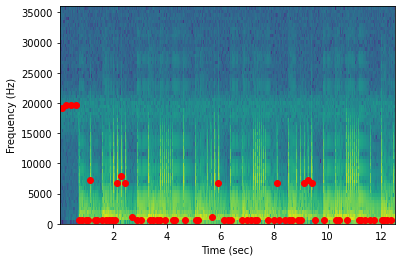

Number of maximums : 136


In [12]:
encoder.display_spectrogram(display_anchors=True)
print(f"Number of maximums : {np.size(encoder.anchors)}")

Lorsque l'on s'intéresse au nombre de maxima, on arrive a une centaine pour un paramètre de 50 en entrée de la fonction peak_local_max. 

### Question 3

Dans le hash il n'y a que la différence de temps entre la cible et l'ancre, ainsi le hash est invariant pas translation, on peut trouver un extrait même s'il n'a pas la même origine que le son original.

### Question 4

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import read
from algorithm import *
import scipy.signal


# ----------------------------------------------
# Run the script
# ----------------------------------------------
if __name__ == '__main__':

    folder = './samples/'

    # 1: Load the audio files
    import os
    audiofiles = os.listdir(folder)
    audiofiles = [item for item in audiofiles if item[-4:] =='.wav']

    # 2: Set the parameters of the encoder
    size = 128
    noverlap = 32

    # 3: Construct the database
    database = []
    
    for name in audiofiles:
        fingerprint = Encoding()
        fs, s = read('./samples/' + name)
        fingerprint.process(fs, s)
        hashes = fingerprint.hashes
        database.append({'song': name, 'hashcodes': hashes})

    # 4: Save the database
    with open('songs.pickle', 'wb') as handle:
        pickle.dump(database, handle, protocol=pickle.HIGHEST_PROTOCOL)

Ou alors on peut juste dire d'aller voir le fichier database.py ...

### Question 5

In [37]:
#Exemple lorsque l'extrait correspond au morceau 

hashes1 = database[2]

encoder = Encoding()
fs, s = read('./samples/Frisk - Au.Ra.wav')
encoder.process(fs, s)
hashes2 = encoder.hashes

match = Matching(hashes1, hashes2)
match.display_scatterplot()


TypeError: string indices must be integers

### Question 6

### Question 7

### Question 8